In [153]:
## importing libraries as we go along

import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

import argparse

In [154]:
### defining class for reading the given data from HDF5 file with Coordinates, Masses, and Velocities


particle_type = 1  ## setting to DM particles for now; star particles are 4

class ReadData():
    '''
    Class to read data from HDF5 file with Coordinates, Masses, and Velocities
    '''

    def __init__(self, particle_type, folder, number='001', root='snapshot_'):
        self.directory =  os.getcwd() + '/' + folder + '/'  ## get current working directory
        #print('directory: ', os.getcwd())
        self.root = root #; print(type(self.root))
        self.number = number #; print(type(self.number))
        self.filename = self.directory + self.root + self.number + '.hdf5'
        print('directory and file: ', self.filename)
        self.file = h5py.File(self.filename, 'r')  ## open the file in read mode
        self.velocities = self.file['PartType{}'.format(particle_type)]['Velocities'][:,:3]
        self.masses = self.file['PartType{}'.format(particle_type)]['Masses'][:]
        self.coordinates = self.file['PartType{}'.format(particle_type)]['Coordinates'][:,:3]

    def get_file(self):
        print('file: ', self.file)
        return self.file

    def get_coordinates(self):
        return self.coordinates
    
    def get_masses(self):
        return self.masses
    
    def get_velocities(self):
        return self.velocities


In [155]:
### create a class to calculate the min and max value of a given variable (i.e. masses, velocities, coordinates)

class MinMax():
    '''
    Class to calculate the min and max value of a given variable
    '''
    
    def __init__(self, data):
        self.data = data
        self.min = np.min(self.data)
        self.max = np.max(self.data)
        
    def get_min(self):
        return self.min
    
    def get_max(self):
        return self.max
    
    def get_range(self):
        return self.max - self.min
    
    def get_data(self):
        return self.data
    
    def get_mean(self):
        return np.mean(self.data)
    
    def get_std(self):
        return np.std(self.data)
    
    def get_median(self):
        return np.median(self.data)
    
    def get_percentile(self, percentile):
        return np.percentile(self.data, percentile)
    
    def get_histogram(self, bins=100):
        return np.histogram(self.data, bins=bins)
    
    def get_histogram_values(self, bins=100):
        values, bins = np.histogram(self.data, bins=bins)
        return values, bins

In [156]:
### getting set-up to make range(s) for plot histograms

data_DM = ReadData(4, 'examples/failed-galaxy/', '001')
masses_DM = data_DM.get_masses()

minmax_DM_masses = MinMax(masses_DM)

print('masses_DM: ', masses_DM)
print('sum of the masses: ', np.sum(masses_DM))
print('minmax_DM_masses: ', minmax_DM_masses.get_min(), minmax_DM_masses.get_max(), minmax_DM_masses.get_range(), minmax_DM_masses.get_mean())

min = minmax_DM_masses.get_min()
max = minmax_DM_masses.get_max()

print('min: ', min, 'max: ', max)

directory and file:  /home/mferrari/gadget4-view/examples/failed-galaxy//snapshot_001.hdf5
masses_DM:  [2.8337295e-06 2.8329280e-06 2.8028855e-06 ... 2.7379199e-06 3.0090164e-06
 2.7131671e-06]
sum of the masses:  0.10460383
minmax_DM_masses:  2.124998e-06 8.047035e-06 5.9220374e-06 2.7599226e-06
min:  2.124998e-06 max:  8.047035e-06


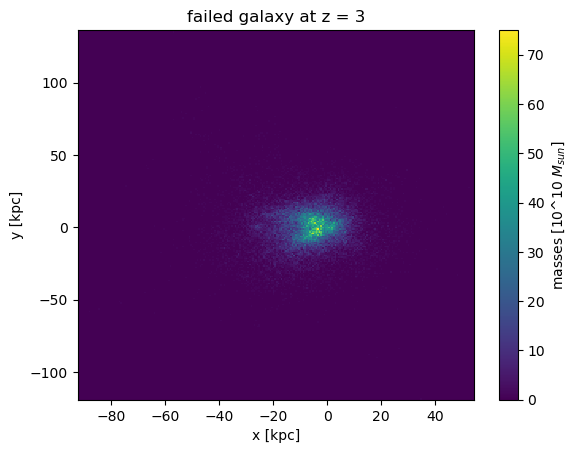

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'failed galaxy at z = 3'}, xlabel='x [kpc]', ylabel='y [kpc]'>)

In [162]:
### making a plotting function to plot 2D histograms of the data (but projecting 3rd dimension to colorbar)

def plot_histogram_2D(data, colorbar_value, bins=100, cmap='viridis', title='2D Histogram', xlabel='X', ylabel='Y'):
    '''
    Function to plot 2D histogram of the data
    '''
    
    fig, ax = plt.subplots()
    values, xedges, yedges, im = ax.hist2d(data[:,0], data[:,1], bins=bins, cmap=cmap)
    fig.colorbar(im, ax=ax, label=colorbar_value)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
    
    return fig, ax

### plotting the 2D histogram of the data

plot_histogram_2D(data_DM.get_coordinates(), 'masses [10^10 $M_{sun}$]', bins=250, title='failed galaxy at z = 3', xlabel='x [kpc]', ylabel='y [kpc]')


In [ ]:
### add parsing arguments for the input file, particle type, and what type of weighting to give to the plot

'''
parser = argparse.ArgumentParser(description='Read data from HDF5 file and plot it')
parser.add_argument('--folder', type=str, help='Folder containing the HDF5 files')
parser.add_argument('--number', default='000', type=str, help='Number of the snapshot')
parser.add_argument('--particle_type', type=int, help='Type of particle to read')
parser.add_argument('--weight', type=str, help='Type of weighting to give to the plot')
args = parser.parse_args()

data = ReadData(args.particle_type, args.folder, args.number)
print('coordinates: ', data.get_coordinates())
print('masses: ', data.get_masses())
print('velocities: ', data.get_velocities())
'''

### add default values (?)

In [ ]:
file_DM = ReadData(1, 'examples/failed-galaxy','001')
file_DM.get_file()

coords = file_DM.get_coordinates()
masses = file_DM.get_masses()
velocities = file_DM.get_velocities()

In [ ]:
### plotting the data

plt.figure()
plt.hist(coords, bins=50)
plt.xlabel('x')
plt.ylabel('N')
plt.title('Histogram of x-coordinates')
plt.show()
plt.legend()
plt.close()

plt.figure()
plt.hist(masses, bins=50)
plt.xlabel('Mass')
plt.ylabel('N')
plt.title('Histogram of masses')
plt.show()
plt.close()